In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
import MAPT
import pandas as pd

%load_ext rpy2.ipython

/home/spiridon/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
database_location = "data/database"
silva = MAPT.silva_manager(database_location,dataset='ref',release=132)

search = silva.find_taxpath(['Fungi','Cercozoa','Peronosporomycetes'])

for el in search:
    print(el)


(entry(path=Eukaryota;SAR;Stramenopiles;Peronosporomycetes;,taxid=10083,rank=phylum), 954)
(entry(path=Eukaryota;SAR;Rhizaria;Cercozoa;,taxid=9388,rank=phylum), 3656)
(entry(path=Eukaryota;Opisthokonta;Nucletmycea;Fungi;,taxid=6516,rank=kingdom), 29123)


In [5]:
F='GTGYCAGCMGCCGCGGTAA'
R='CCGYCAATTYMTTTRAGTTT'
Medicago_sativa = 'GAFF01033989.4391.6188'

paths = ["Eukaryota;SAR;Rhizaria;Cercozoa;",
        "Eukaryota;SAR;Stramenopiles;Peronosporomycetes;",
        "Eukaryota;Opisthokonta;Nucletmycea;Fungi;"]

designer_gPNA = MAPT.PNA_Designer(result_file='data/gPNA.csv',target_silva_accession=Medicago_sativa,
                             sequence_silva_path=paths,
                             primer_F=F,primer_R=R,kmer_range=(9,13),silva_dir='data/database',
                                 silva_release=132)

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete
Results have been written to data/gPNA.csv


In [6]:
gPNA_target = "CGGCCGCTACGC"
gPNA = pd.DataFrame(designer_gPNA.map_PNA(gPNA_target))
gPNA

,Nucleotide,index,unique match,absolute match,PNA mapping
0,G,0,10,303110,0
1,T,1,20,606220,0
2,G,2,30,909334,0
3,C,3,40,1212448,0
4,C,4,50,1515666,0
...,...,...,...,...,...
585,A,585,42,728250,0
586,C,586,32,552652,0
587,G,587,22,377034,0
588,G,588,12,201394,0


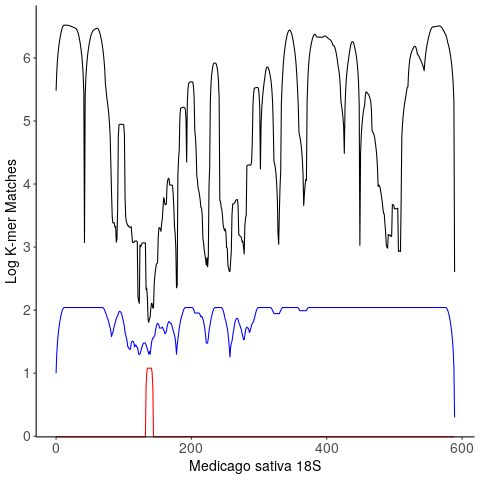

In [7]:
%%R -i gPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(gPNA,aes(x=index,y=absolute.match))+
    geom_line()+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=PNA.mapping),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Medicago sativa 18S")
print(plt)
ggsave('figures/gPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)

# mPNA and pPNA

In [8]:
greengenes_fasta = "data/gg_97_otus_4feb2011.fasta"
F515 = "GTGCCAGCMGCCGCGGTAA"
R926="CCGYCAATTYMTTTRAGTTT"
R806 = "GGACTACHVGGGTWTCTAAT"
designer_pPNA = MAPT.PNA_Designer(result_file='data/pPNA.csv',
                                          target_fastafile="data/A_thaliana_chloroplast.fasta",
                                          sequence_file=greengenes_fasta,
                                          primer_F=F515,primer_R=R926,
                                          kmer_range=(9,13))

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete
Results have been written to data/pPNA.csv


In [9]:
pPNA_target = "GGCTCAACCCTGGACAG"
pPNA = pd.DataFrame(designer_pPNA.map_PNA(pPNA_target))
pPNA

,Nucleotide,index,unique match,absolute match,PNA mapping
0,G,0,10,298066,0
1,T,1,20,596146,0
2,G,2,30,894270,0
3,C,3,40,1192398,0
4,C,4,50,1490502,0
...,...,...,...,...,...
409,A,409,46,1067888,0
410,C,410,36,805368,0
411,G,411,26,542200,0
412,G,412,16,274238,0


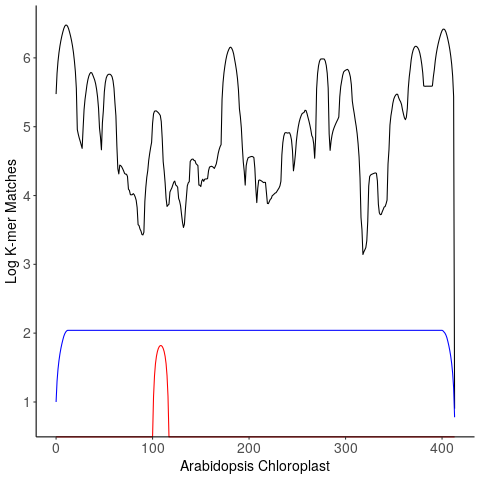

In [10]:
%%R -i pPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(pPNA,aes(x=index,y=absolute.match))+
    geom_line(color='black')+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=PNA.mapping),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Arabidopsis Chloroplast")

print(plt)
ggsave('figures/pPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


In [11]:
#http://greengenes.lbl.gov/Download/Sequence_Data/Fasta_data_files/Caporaso_Reference_OTUs/gg_otus_4feb2011.tgz
#Then you must decompress
greengenes_fasta = "data/gg_97_otus_4feb2011.fasta"
F515 = "GTGCCAGCMGCCGCGGTAA"
R806 = "GGACTACHVGGGTWTCTAAT"
R926="CCGYCAATTYMTTTRAGTTT"
designer_mPNA = MAPT.PNA_Designer(result_file='data/mPNA.csv',
                                          target_fastafile="data/A_thaliana_mitochondria.fasta",
                                          sequence_file=greengenes_fasta,
                                          primer_F=F515,primer_R=R926,
                                          kmer_range=(9,13))

Amplifying PNA target
Amplifying and Collecting sequence K-mers
Mapping Kmers
Mapping Complete
Results have been written to data/mPNA.csv


In [12]:
mPNA_target = "GGCAAGTGTTCTTCGGA"
mPNA = pd.DataFrame(designer_mPNA.map_PNA(mPNA_target))
mPNA

,Nucleotide,index,unique match,absolute match,PNA mapping
0,G,0,10,298066,0
1,T,1,20,596146,0
2,G,2,30,894270,0
3,C,3,40,1192398,0
4,C,4,50,1490502,0
...,...,...,...,...,...
404,A,404,46,1067888,0
405,C,405,36,805368,0
406,G,406,26,542200,0
407,G,407,16,274238,0


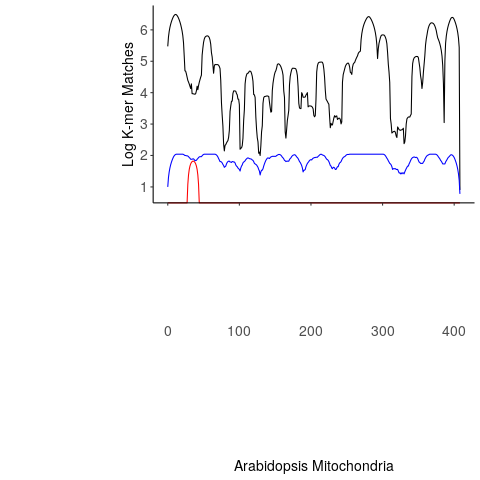

In [13]:
%%R -i mPNA
library('ggplot2')

axis_text_size = 14

plt<-ggplot(mPNA,aes(x=index,y=absolute.match))+
    geom_line()+
    geom_line(aes(y=unique.match),color='blue')+
    geom_line(aes(y=PNA.mapping),color = 'red')+
    scale_y_log10(
      breaks = scales::trans_breaks("log10", function(x) 10^x),
      labels = scales::trans_format("log10", scales::math_format(.x)))+
    theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(y="Log K-mer Matches",x="Arabidopsis Mitochondria")

print(plt)        
        
ggsave('figures/mPNA.png',plot=plt,width=6,height=6,device='png',dpi=900)


# Justifying the orientation of the PNA

In [19]:
def kmerize(DNA,krng,rc=True,size_mapped=False):
    seq_kmers=set()
    for i in range(0,len(DNA)):
        for k in krng:
            if i+k<len(DNA):
                seq_kmers.add(DNA[i:i+k])
                if rc:
                    seq_kmers.add(MAPT.InSilico_PCR.reverse_complement(DNA[i:i+k]))
    if size_mapped:
        seq_kmers_mapped={}
        for i in krng:
            seq_kmers_mapped[i]=set()
        for seq in seq_kmers:
            seq_kmers_mapped[len(seq)].add(seq)
        return(seq_kmers_mapped)
    return(seq_kmers)


def Enumerate_Kmers(target_seq,sequences,krng=(8,12)):
    print("Enumerating {} for k-mer range {}-{} in {} sequences".format(target_seq,krng[0],krng[1],str(len(sequences))))
    krng = list((range(krng[0],krng[1]+1)))
    targ_k = kmerize(target_seq,krng,rc=False)
    #must account for reverse
    targ_k.union(kmerize(target_seq[::-1],krng,rc=False))
    knum=[]
    tot=len(sequences)
    for i,sequence in enumerate(sequences):
        print("{}% Complete".format(str(round(i/tot*100,2))),end='\r')
        seq_kmers = kmerize(sequence,krng)
        knum.append(len(targ_k.intersection(seq_kmers)))
    print("100% Complete")  
    return(knum)


gPNA = "CGGCCGCTACGC"

gPNA_alternate = "GCCGGCGATGCG"
Fungi_path = silva.find_taxpath(['Fungi'])[0][0]['path']

accessions = silva.get_accessions(Fungi_path)
fungi_seqs=silva.get_seqs(accessions)

In [20]:
gPNA_enumerate=Enumerate_Kmers(gPNA,[entry[1] for entry in fungi_seqs])
gPNA_alternate_enumerate=Enumerate_Kmers(gPNA_alternate,[entry[1] for entry in fungi_seqs])

df=pd.DataFrame({'gPNA':gPNA_enumerate,'alternate':gPNA_alternate_enumerate})

Enumerating CGGCCGCTACGC for k-mer range 8-12 in 29123 sequences
100% Completete
Enumerating GCCGGCGATGCG for k-mer range 8-12 in 29123 sequences
100% Completete


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



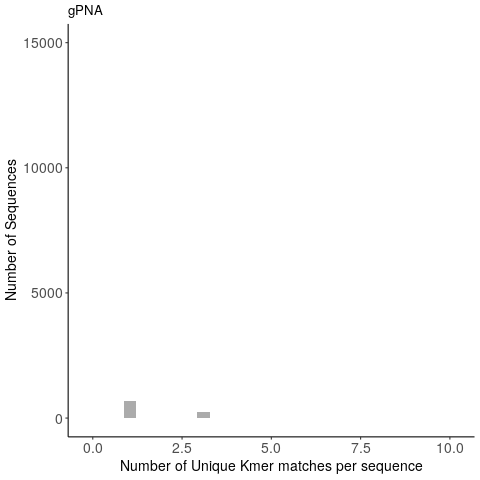

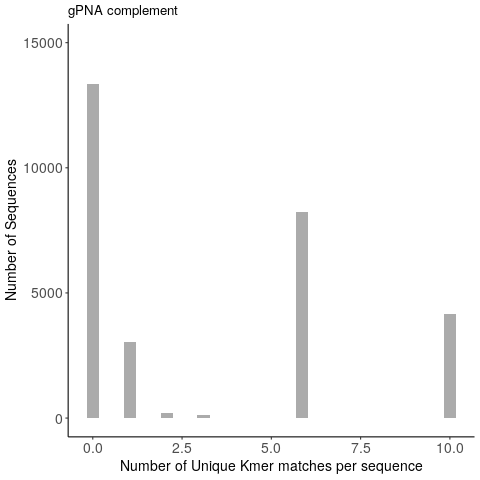

In [21]:
%%R -i df

axis_text_size = 14

gPNA<-ggplot(df, aes(x=gPNA)) + 
  geom_histogram(alpha=.5)+
  theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(title = 'gPNA',y="Number of Sequences",x="Number of Unique Kmer matches per sequence")+
     ylim(c(0,15000))


alternate <-ggplot(df, aes(x=alternate)) + 
  geom_histogram(alpha=.5)+
  theme_bw()+
    theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
       axis.line = element_line(color="black"),
       axis.text = element_text(size=axis_text_size),
       axis.title=element_text(size=axis_text_size))+
    labs(title = 'gPNA complement',y="Number of Sequences",x="Number of Unique Kmer matches per sequence")+
  ylim(c(0,15000))

ggsave('figures/gPNA_fungal_kmercount.png',plot=gPNA,width=6,height=6,device='png',dpi=900)

ggsave('figures/gPNAcomplement_fungal_kmercount.png',plot=alternate,width=6,height=6,device='png',dpi=900)


print(gPNA)
print(alternate)

# Finding the targets of the PNA

In [27]:
accessions = silva.get_accessions("Eukaryota;Archaeplastida;")

In [28]:
seqs = silva.get_seqs(accessions)

In [29]:
accession_matches = {}
for accession,seq in seqs:
    accession_matches[accession] = set(MAPT.core._map_PNA(seq,"CGGCCGCTACGC",krange=(9,12)))

In [30]:
accession_hits = {}
for accession in accession_matches:
    if accession_matches[accession] != set([0]):
        accession_hits[accession] = accession_matches[accession] 

In [31]:
results = []
hits = []
for el in accession_hits:
    if 10 in accession_hits[el] or 11 in accession_hits[el] or 12 in accession_hits[el]:
        hits.append(el)
orgs = silva[hits]
orgs

[entry(accession=AAAA02002154.3685.5485,path=Eukaryota;Archaeplastida;Chloroplastida;Charophyta;Phragmoplastophyta;Streptophyta;Embryophyta;Tracheophyta;Spermatophyta;Magnoliophyta;Liliopsida;Poales;Oryza;,organism_name=Oryza sativa Indica Group (long-grained rice)),
 entry(accession=AAAA02037638.4363.6163,path=Eukaryota;Archaeplastida;Chloroplastida;Charophyta;Phragmoplastophyta;Streptophyta;Embryophyta;Tracheophyta;Spermatophyta;Magnoliophyta;Liliopsida;Poales;Oryza;,organism_name=Oryza sativa Indica Group (long-grained rice)),
 entry(accession=AAAA02038309.5065.6864,path=Eukaryota;Archaeplastida;Chloroplastida;Charophyta;Phragmoplastophyta;Streptophyta;Embryophyta;Tracheophyta;Spermatophyta;Magnoliophyta;Liliopsida;Poales;Alloteropsis;,organism_name=Oryza sativa Indica Group (long-grained rice)),
 entry(accession=AAAA02039385.3728.5528,path=Eukaryota;Archaeplastida;Chloroplastida;Charophyta;Phragmoplastophyta;Streptophyta;Embryophyta;Tracheophyta;Spermatophyta;Magnoliophyta;Liliopsi

In [32]:
silva[['AC196718.176269.178069','AC197341.77053.78853']]

[entry(accession=AC196718.176269.178069,path=Eukaryota;Archaeplastida;Chloroplastida;Charophyta;Phragmoplastophyta;Streptophyta;Embryophyta;Tracheophyta;Spermatophyta;Magnoliophyta;Liliopsida;Poales;Zea;,organism_name=Zea mays),
 entry(accession=AC197341.77053.78853,path=Eukaryota;Archaeplastida;Chloroplastida;Charophyta;Phragmoplastophyta;Streptophyta;Embryophyta;Tracheophyta;Spermatophyta;Magnoliophyta;Liliopsida;Poales;Zea;,organism_name=Zea mays)]

# Neighboring plants

In [33]:
Chamaenerion_angustifolium ='AUAUGCUUGUCUCAAAGAUUAAGCCAUGCAUGUGUAAGUAUGAACUAAUUCAGACUGUGAAACUGCGAAUGGCUCAUUAA\
AUCAGUUAUAGUUUGUUUGAUGGUAUCUACUACUCGGAUAACCGUAGUAAUUCUAGAGCUAAUACGUGCAACAAACCCCG\
ACUUCUGGAAGGGAUGCAUUUAUUAGAUAAAAGGUCGACGCGGGCUUUGCCCGUUGCUCUGAUGAUUCAUGAUAACUCGA\
CGGAUCGCACGGCCUUUGCGCCGGCGACGCAUCAUUCAAAUUUCUGCCCUAUCAACUUUCGAUGGUAGGAUAGUGGCCUA\
CUAUGGUGGUGACGGGUGACGGAGAAUUAGGGUUCGAUUCCGGAGAGGGAGCCUGAGAAACGGCUACCACAUCCAAGGAA\
GGCAGCAGGCGCGCAAAUUACCCAAUCCUGACACGGGGAGGUAGUGACAAUAAAUAACAAUACCGGGCUCUUACGAGUCU\
GGUAAUUGGAAUGAGUACAAUCUAAAUCCCUUAACGAGGAUCCAUUGGAGGGCAAGUCUGGUGCCAGCAGCCGCGGUAAU\
UCCAGCUCCAAUAGCGUAUAUUUAAGUUGUUGCAGUUAAAAAGCUCGUAGUUGGACCUUGGGUUGGGUCGACCGGUCCGC\
CUUACGGUGUGCACCGAUCGGCUCGUCCCUUCUACCGGCGAUGCGCUCCUGGACUUAAUUGGCCGGGUCGUGCCUCCGGU\
GCUGUUACUUUGAAGAAAUUAGAGUGCUCAAAGCAAGCCUACGCUCUGGAUACAUUAGCAUGGGAUAACAUUAUAGGAUU\
CCGAUCCUAUUGUGUUGGCCUUCGGGAUCGGAGUAAUGAUUAACAGGGACAGUCGGGGGCAUUCGUAUUUCAUAGUCAGA\
GGUGAAAUUCUUGGAUUUAUGAAAGACGAACAACUGCGAAAGCAUUUGCCAAGGAUGUUUUCAUUAAUCAAGAACGAAAG\
UUGGGGGCUCGAAGACGAUCAGAUACCGUCCUAGUCUCAACCAUAAACGAUGCCGACCAGGGAUCAGCGGAUGUUACUCU\
UAGGACUCCGCUGGCACCUUAUGAGAAAUCAAAGUUUUUGGGUUCCGGGGGGAGUAUGGUCGCAAGGCUGAAACUUAAAG\
GAAUUGACGGAAGGGCACCACCAGGAGUGGAGCCUGCGGCUUAAUUUGACUCAACACGGGGAAACUUACCAGGUCCAGAC\
AUAGUAAGGAUUGACAGACUGAGAGCUCUUUCUUGAUUCUAUGGGUGGUGGUGCAUGGCCGUUCUUAGUUGGUGGAGCGA\
UUUGUCUGGUUAAUUCCGUUAACGAACGAGACCUCAGCCUGCUAACUAGCUAUGUGGAGGAUUUUCUCCACGGCCAGCUU\
CUUAGAGGGACUAUGGCCGCUUAGGCCAAGGAAGUUUGAGGCAAUAACAGGUCUGUGAUGCCCUUAGAUGUUCUGGGCCG\
CACGCGCGCUACACUGAUGUAUUCAACGAGUCUAUAGCCUUGGCCGACAGGCCCGGGUAAUCUUUGAAAUUUCAUCGUGA\
UGGGGAUAGAUCAUUGCAAUUGUUGGUCUUCAACGAGGAAUUCCUAGUAAGCGCGAGUCAUCAGCUCGCGUUGACUACGU\
CCCUGCCCUUUGUACACACCGCCCGUCGCUCCUACCGAUUGAAUGGUCCGGUGAAGUGUUCGGAUCGCGGCGACGUGGGC\
GCUCGUCGCUGACGACGUCGCGAGAAGUCCACUGAACCUUAUCAUUUAGAGGAAGG'.replace('U','T')

Grindelia_squarrosa_var_squarrosa = 'UACCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUAAGCCAUGCAUGUGUAAGUAUGAACAAAUUCAGAC\
UGUGAAACUGCGAAUGGCUCAUUAAAUCAGUUAUAGUUUGUUUGAUGGUACCUGCUACUCGGAUAACCGUAGUAAUUCUA\
GAGCUAAUACGUGCAACAAACCCCGACUUCUGGAAGGGAUGCAUUUAUUAGAUAAAAGGUCGACGCGGGCUCUGCCCGUU\
GCUGCGAUGAUUCAUGAUAACUCGACGGAUCGCACGGCCCUCGUGCCGGCGACGCAUCAUUCAAAUUUCUGCCCUAUCAA\
CUUUCGAUGGUAGGAUAGUGGCCUACUAUGGUGGUGACGGGUGACGGAGAAUUAGGGUUCGAUUCCGGAGAGGGAGCCUG\
AGAAACGGCUACCACAUCCAAGGAAGGCAGCAGGCGCGCAAAUUACCCAAUCCUGACACGGGGAGGUAGUGACAAUAAAU\
AACAAUACCGGGCUCAUACGAGUCUGGUAAUUGGAAUGAGUACAAUCUAAAUCCCUUAACGAGGAUCCAUUGGAGGGCAA\
GUCUGGUGCCAGCAGCCGCGGUAAUUCCAGCUCCAAUAGCGUAUAUUUAAGUUGUUGCAGUUAAAAAGCUCGUAGUUGGA\
CUUUGGGUUGGGUCGGCCGGUCCGCCUUCUGGUGUGCACCGGUUUACUCGUCCCUUCUGUCGGCGAUACGCUCCUGGCCU\
UAAUUGGCCGGGUCGUGCCUCCGGCGCUGUUACUUUGAAGAAAUUAGAGUGCUCAAAGCAAGCCUACGCUCUGUAUACAU\
UAGCAUGGGAUAACAUCAUAGGAUUUCGGUCCUAUUACGUUGGCCUUCGGGAUCGGAGUAAUGAUUAACAGGGACAGUCG\
GGGGCAUUCGUAUUUCAUAGUCAGAGGUGAAAUUCUUGGAUUUAUGAAAGACGAACAACUGCGAAAGCAUUUGCCAAGGA\
UGUUUUCAUUAAUCAAGAACGAAAGUUGGGGGCUCGAAGACGAUCAGAUACCGUCCUAGUCUCAACCAUAAACGAUGCCG\
ACCAGGGAUCAGCGGAUGUUGCUUUUAGGACUCCGCUGGCACCUUAUGAGAAAUCAAAGUUUUUGGGUUCCGGGGGGAGU\
AUGGUCGCAAGGCUGAAACUUAAAGGAAUUGACGGAAGGGCACCACCAGGAGUGGAGCCUGCGGCUUAAUUUGACUCAAC\
ACGGGGAAACUUACCAGGUCCAGACAUAGUAAGGAUUGACAGACUGAGAGCUCUUUCUUGAUUCUAUGGGUGGUGGUGCA\
UGGCCGUUCUUAGUUGGUGGAGCGAUUUGUCUGGUUAAUUCCGUUAACGAACGAGACCUCAGCCUGCUAACUAGCUAUGU\
GGAGGUAUCCCUCCACGGCCAGCUUCUUAGAGGGACUAUGGCCUUUUAGGCCACGGAAGUUUGAGGCAAUAACAGGUCUG\
UGAUGCCCUUAGAUGUUCUGGGCCGCACGCGCGCUACACUGAUGUAUUCAACGAGUAUAUAGCCUUGGCCGACAGGCCCG\
GGAAAUCUUUGAAAUUUCAUCGUGAUGGGGAUAGAUCAUUGCAAUUGUUGGUCUUAAACGAGGAAUUCCUAGUAAGCGCG\
AGUCAUCAGCUCGCGUUGACUACGUCCCUGCCCUUUGUACACACCGCCCGUCGCUCCUACCGAUUGAAUGGUCCGGUGAA\
GUGUUAGGAUCGCGGCGACGUGGGCGGUUCGCCGCCUGCGACGUCGCGAGAAUUCCACUGAACCUUAUCAUUUAGAGGAA\
GGAGAAGUCGUAACAAGGUUUCCGUAGGUGAACCUGCGGAAGGAUCAUUG'.replace('U','T')

In [34]:
F='GTGYCAGCMGCCGCGGTAA'
R='CCGYCAATTYMTTTRAGTTT'
gPNA = "CGGCCGCTACGC"

Nplants = [['Chamaenerion',Chamaenerion_angustifolium],
           ['Grindelia',Grindelia_squarrosa_var_squarrosa]]

missing = []
V4s=[]
for entry in Nplants:

    accession,seq=entry
    try:
        V4 = MAPT.InSilico_PCR.sim_amplify(F,R,seq)
    except MAPT.InSilico_PCR.PrimerError:
        V4=''
        missing.append(accession)
    if V4:
        V4s.append((accession,V4))



In [35]:
V4s

[('Chamaenerion',
  'GTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTTAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACCTTGGGTTGGGTCGACCGGTCCGCCTTACGGTGTGCACCGATCGGCTCGTCCCTTCTACCGGCGATGCGCTCCTGGACTTAATTGGCCGGGTCGTGCCTCCGGTGCTGTTACTTTGAAGAAATTAGAGTGCTCAAAGCAAGCCTACGCTCTGGATACATTAGCATGGGATAACATTATAGGATTCCGATCCTATTGTGTTGGCCTTCGGGATCGGAGTAATGATTAACAGGGACAGTCGGGGGCATTCGTATTTCATAGTCAGAGGTGAAATTCTTGGATTTATGAAAGACGAACAACTGCGAAAGCATTTGCCAAGGATGTTTTCATTAATCAAGAACGAAAGTTGGGGGCTCGAAGACGATCAGATACCGTCCTAGTCTCAACCATAAACGATGCCGACCAGGGATCAGCGGATGTTACTCTTAGGACTCCGCTGGCACCTTATGAGAAATCAAAGTTTTTGGGTTCCGGGGGGAGTATGGTCGCAAGGCTGAAACTTAAAGGAATTGACGGA'),
 ('Grindelia',
  'GTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTTAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGGACTTTGGGTTGGGTCGGCCGGTCCGCCTTCTGGTGTGCACCGGTTTACTCGTCCCTTCTGTCGGCGATACGCTCCTGGCCTTAATTGGCCGGGTCGTGCCTCCGGCGCTGTTACTTTGAAGAAATTAGAGTGCTCAAAGCAAGCCTACGCTCTGTATACATTAGCATGGGATAACATCATAGGATTTCGGTCCTATTACGTTGGCCTTCGGGATCGGAGTAATGATTAACAGGGACAGTCGGGGGCATTCGTATTTCATAGTCAGAGGTGAAATTCTTGGATTTATGAAAGA

In [36]:
accession_matches={}
for accession,seq in V4s:
    accession_matches[accession] = set(MAPT.core._map_PNA(seq,"CGGCCGCTACGC",krange=(9,12)))

In [37]:
accession_matches

{'Chamaenerion': {0, 6, 10, 12}, 'Grindelia': {0}}